In [107]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import shapely as shap
import plotly as py
import plotly.graph_objs as go
import warnings
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
warnings.simplefilter('ignore')

# Online Shoppers Purchasing Intention

## Predicting the Purchasing intentions of a potential customer by analysing his MetaData(Digital footprints) for targeted marketing.

In [128]:
data=pd.read_csv("online_shoppers_intention.csv")

C:\Users\Wolborg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Wolborg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



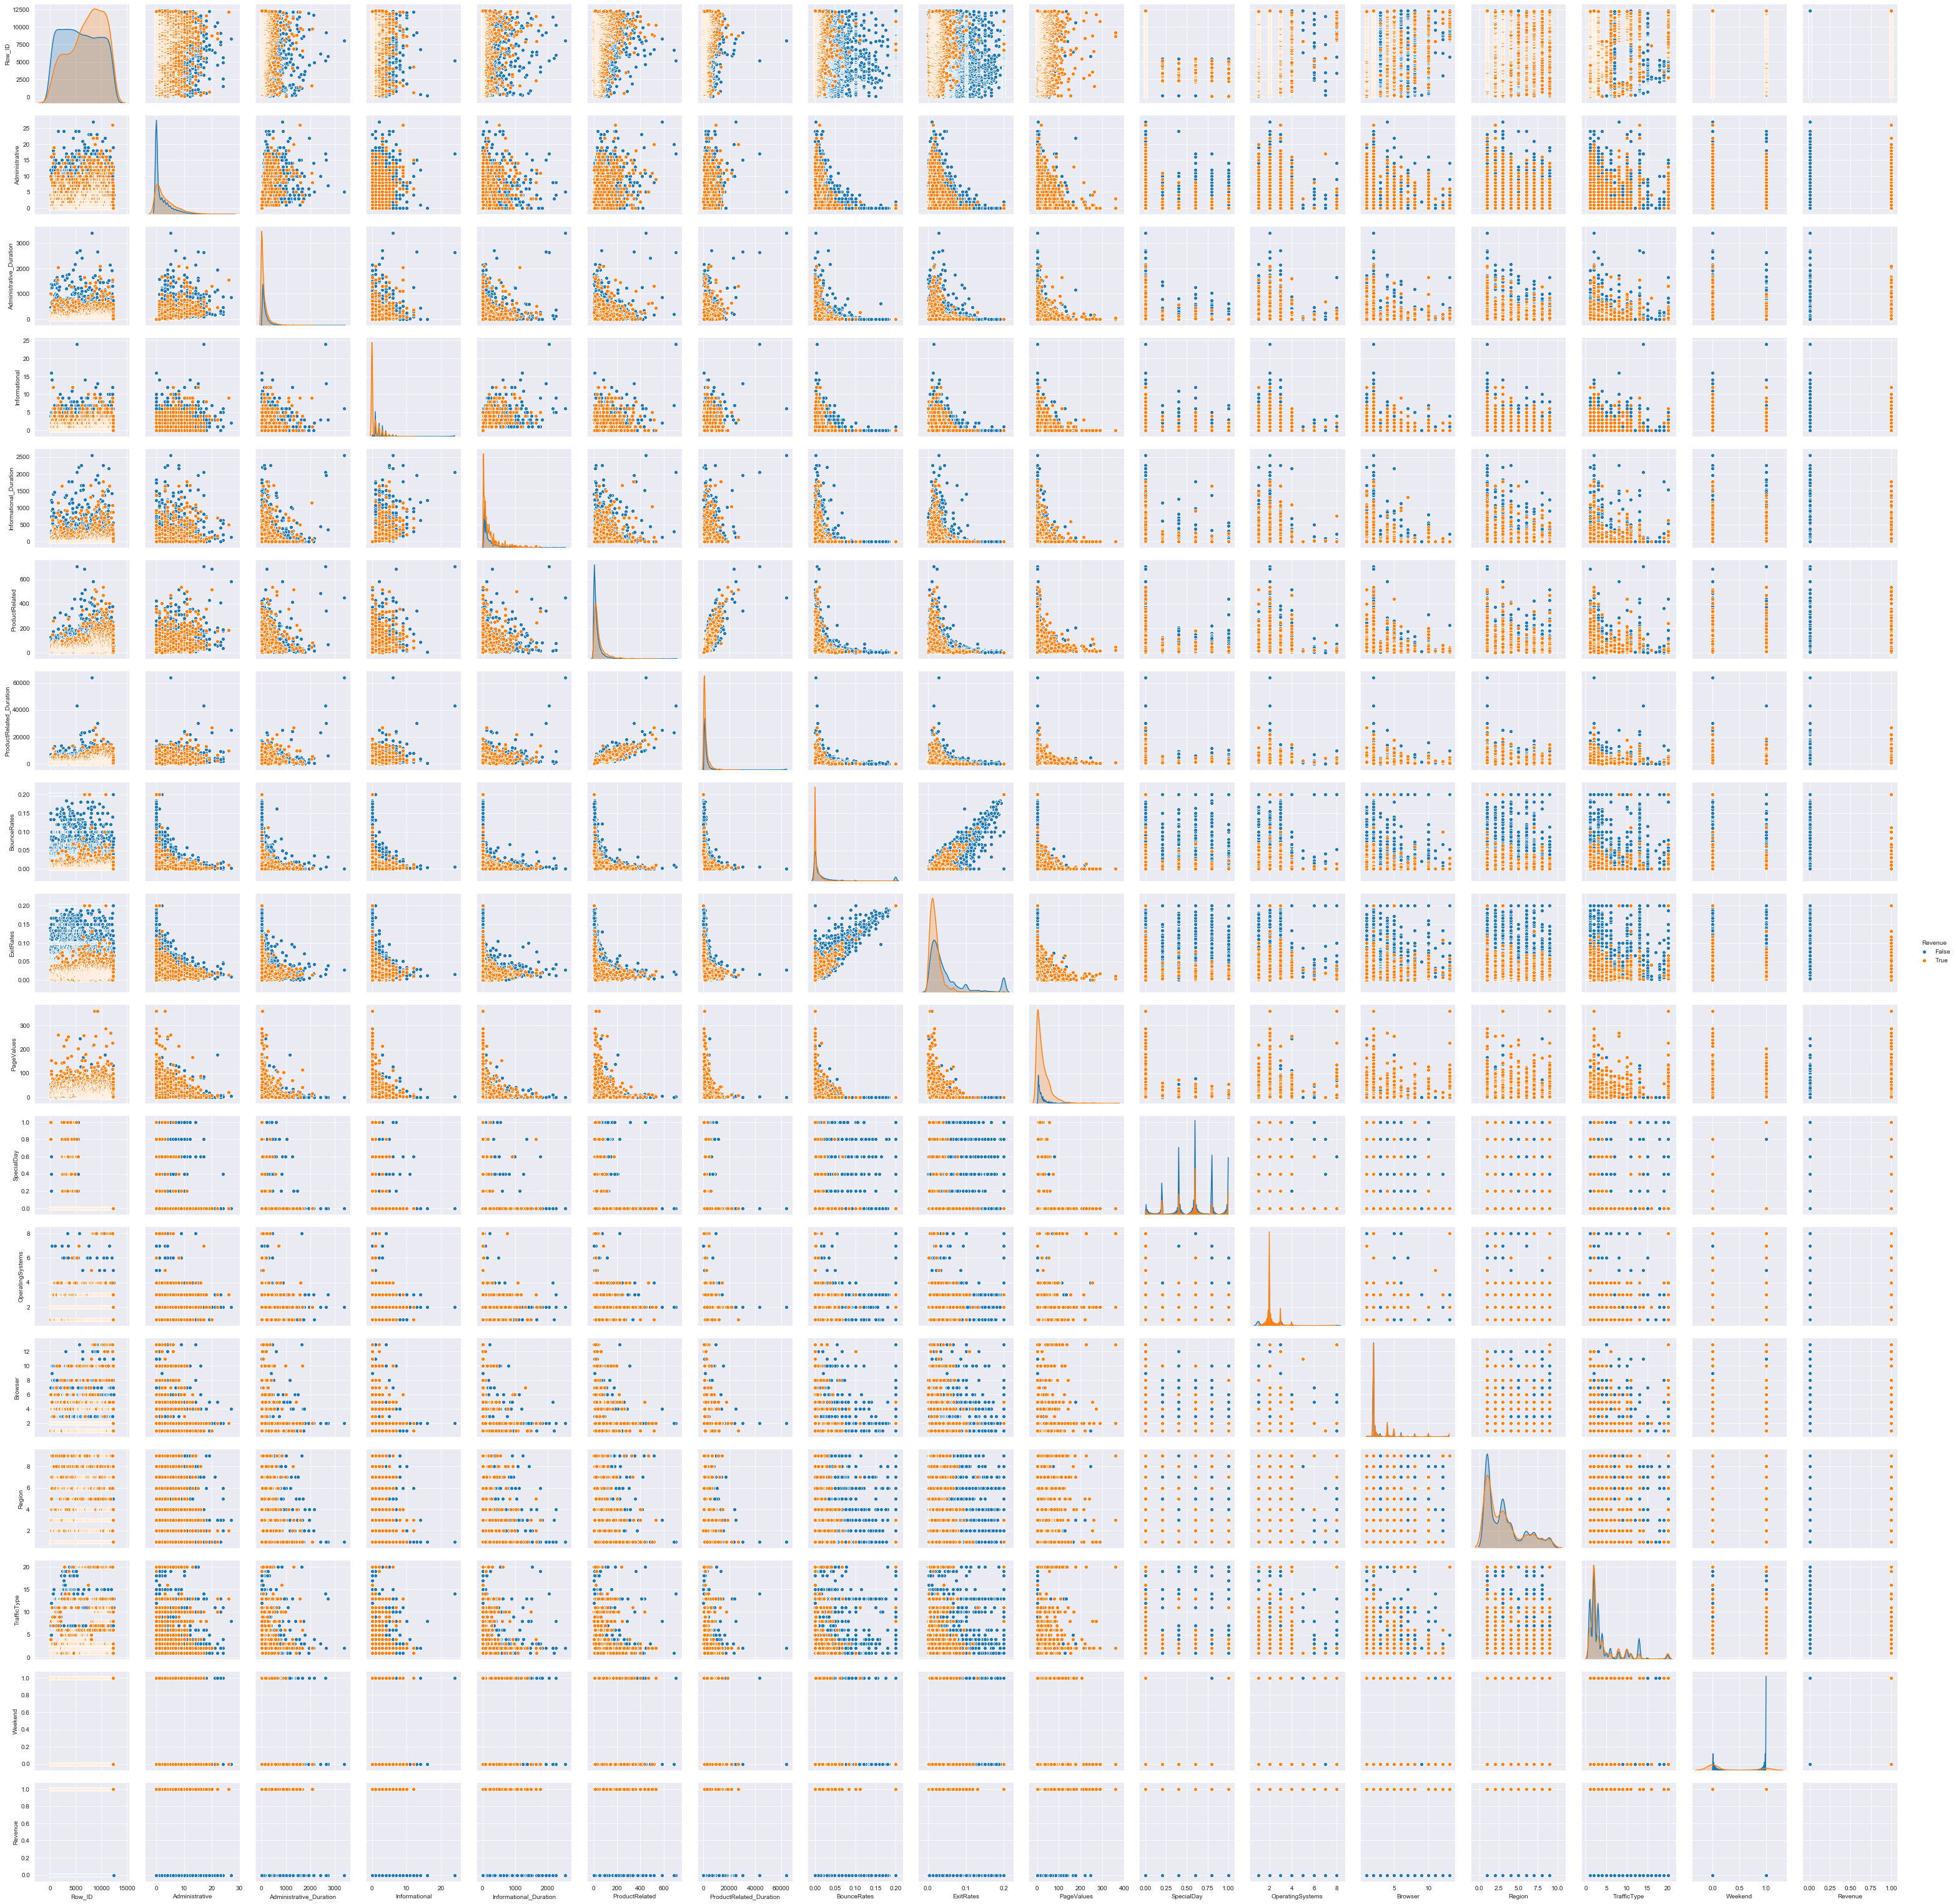

In [3]:
#sns.pairplot(data,hue="Revenue",diag_kind="kde")

In [4]:
data.head()

,Row_ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.describe()

,Row_ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,6164.500000,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3559.508744,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,3082.250000,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,6164.500000,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,9246.750000,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,12329.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
data.shape

(12330, 19)

In [7]:
data.corr()

,Row_ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Row_ID,1.000000,0.078462,0.043120,0.068114,0.041539,0.171057,0.146882,-0.050913,-0.074194,0.049522,-0.226455,0.044963,0.021067,0.012813,0.060139,0.016175,0.121329
Administrative,0.078462,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.043120,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.068114,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.041539,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.171057,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.146882,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.050913,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.074194,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.049522,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569


## EDA

### checking the Distribution of customers on Revenue

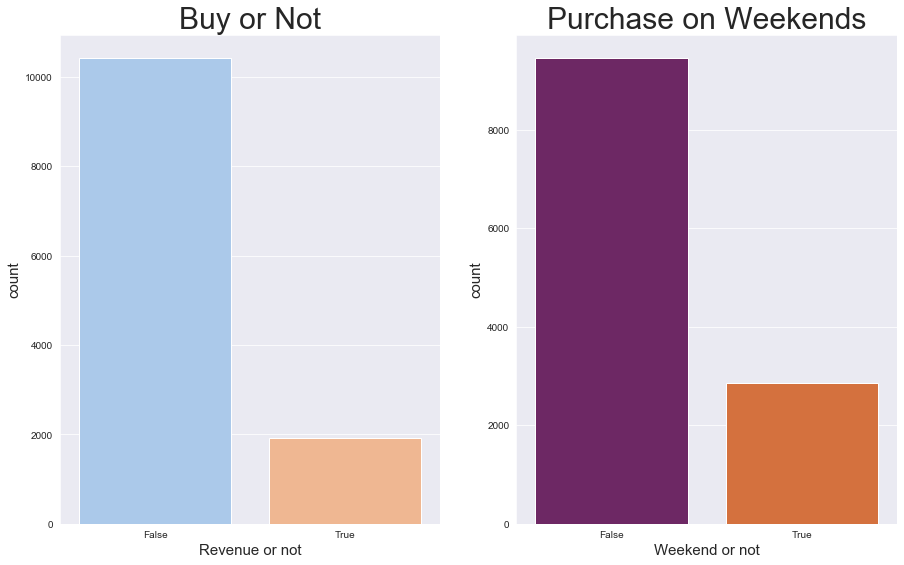

In [10]:
plt.subplot(1, 2, 1)
sns.countplot(data.Revenue, palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Weekend, palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

### checking the Distribution of customers based on type of customer and browser used

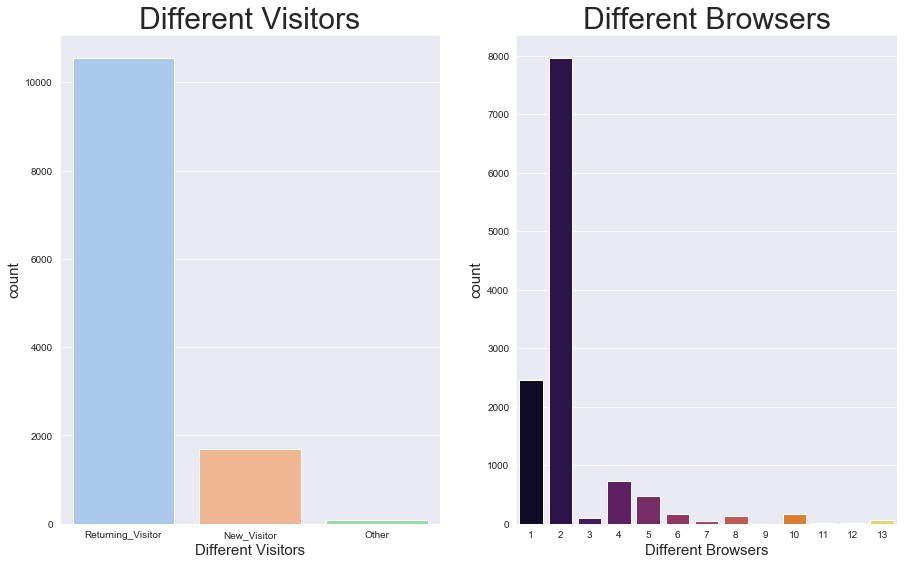

In [11]:
plt.subplot(1, 2, 1)
sns.countplot(data.VisitorType, palette = 'pastel')
plt.title('Different Visitors', fontsize = 30)
plt.xlabel('Different Visitors', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Browser, palette = 'inferno')
plt.title('Different Browsers', fontsize = 30)
plt.xlabel('Different Browsers', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

### visualizing the distribution of customers around the Region and Traffic Type

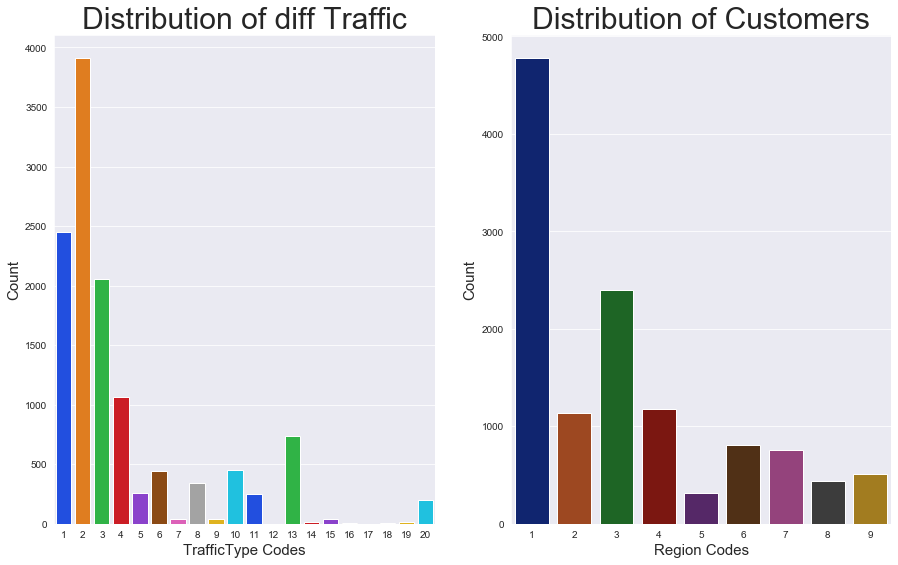

In [12]:

plt.subplot(1, 2, 1)
sns.countplot(data.TrafficType,  palette = 'bright')
plt.title('Distribution of diff Traffic',fontsize = 30)
plt.xlabel('TrafficType Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.subplot(1, 2, 2)
sns.countplot(data.Region, palette = 'dark')
plt.title('Distribution of Customers',fontsize = 30)
plt.xlabel('Region Codes', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### plotting a pie chart for different number of OSes users have and Month

In [13]:
data.OperatingSystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [14]:
data.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [15]:
size = [6601, 2585, 2555, 478, 111]#79+19+7+6=111 labeled as others
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"

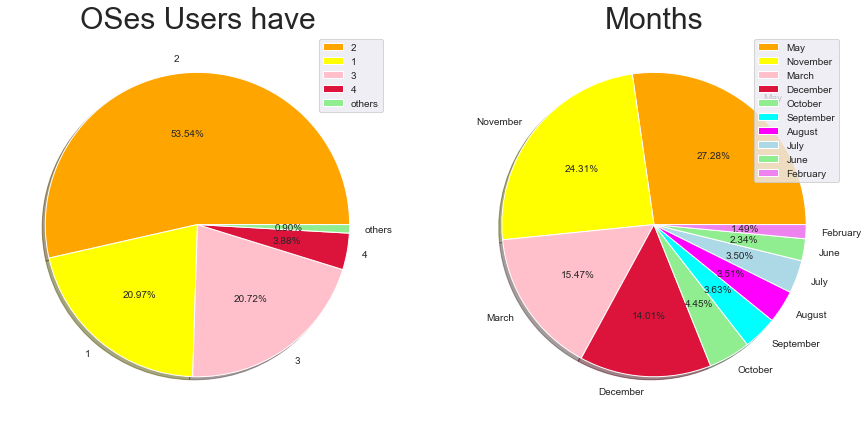

In [16]:
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels,shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 30)
plt.axis('off')
plt.legend()
# counts of months
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"


plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Months', fontsize = 30)
plt.axis('off')
plt.legend()

plt.show()

### Analysis against Revenue(Target Variable)

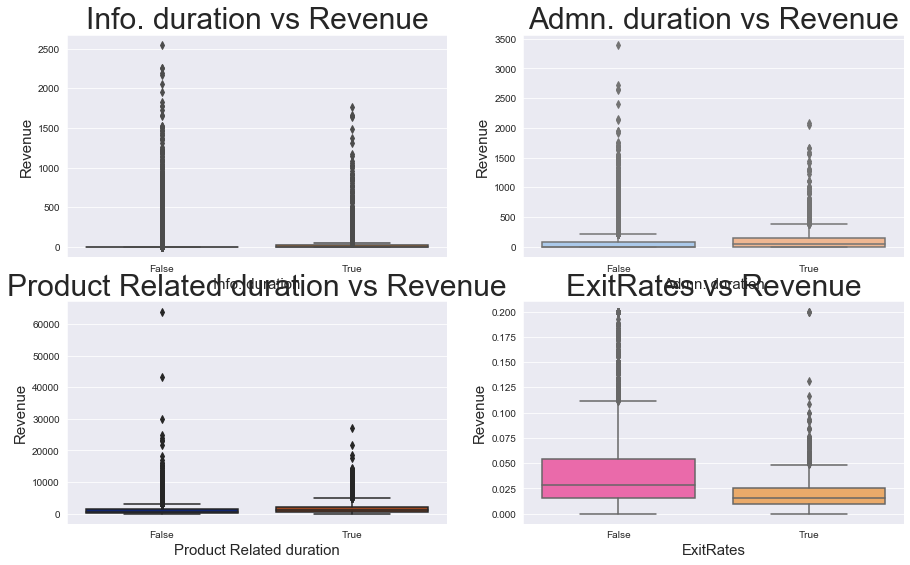

In [17]:
# product related duration vs revenue
plt.subplot(2, 2, 1)
sns.boxplot(data.Revenue, data.Informational_Duration, palette = 'bright')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 2)
sns.boxplot(data.Revenue, data.Administrative_Duration, palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxplot(data.Revenue, data.ProductRelated_Duration, palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxplot(data.Revenue, data.ExitRates, palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show()


Text(0, 0.5, 'Revenue')

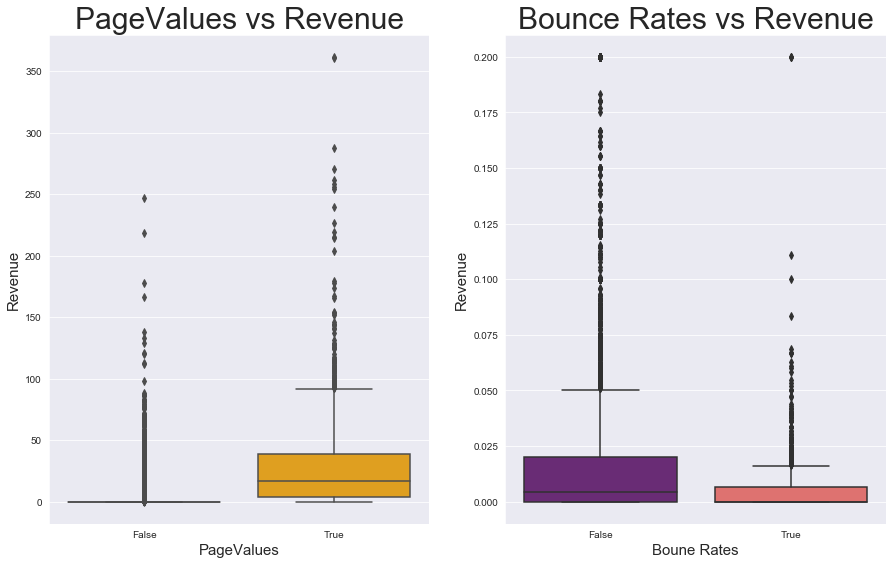

In [18]:
# page values vs revenue


plt.subplot(1, 2, 1)
sns.boxplot(data.Revenue, data.PageValues, palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.xlabel('PageValues', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.boxplot(data.Revenue, data.BounceRates, palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('Boune Rates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

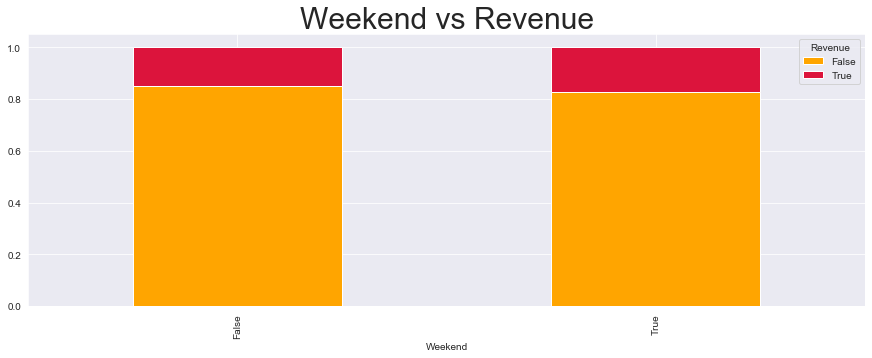

In [19]:
# weekend vs Revenue

df = pd.crosstab(data.Weekend, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

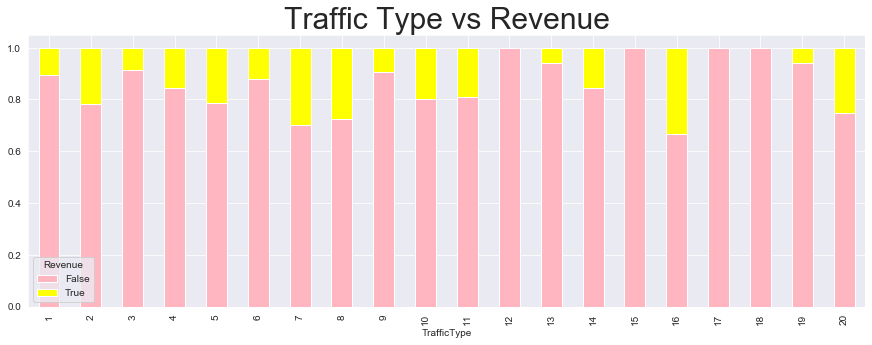

In [20]:
# Traffic Type vs Revenue
df = pd.crosstab(data.TrafficType, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

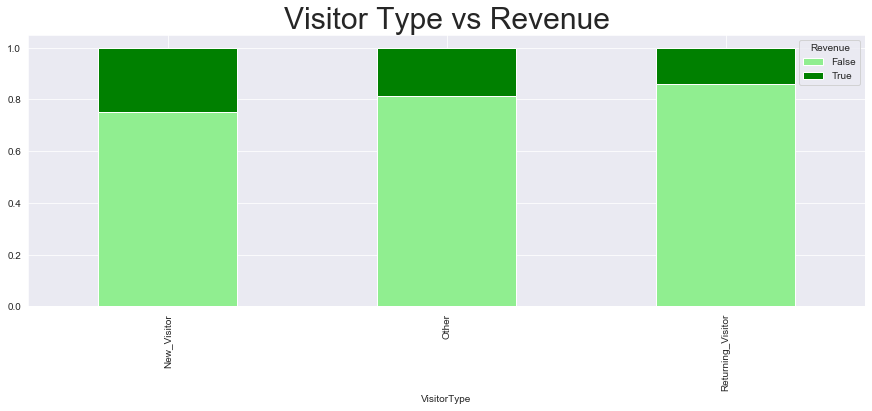

In [21]:
# visitor type vs revenue
df = pd.crosstab(data.VisitorType, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

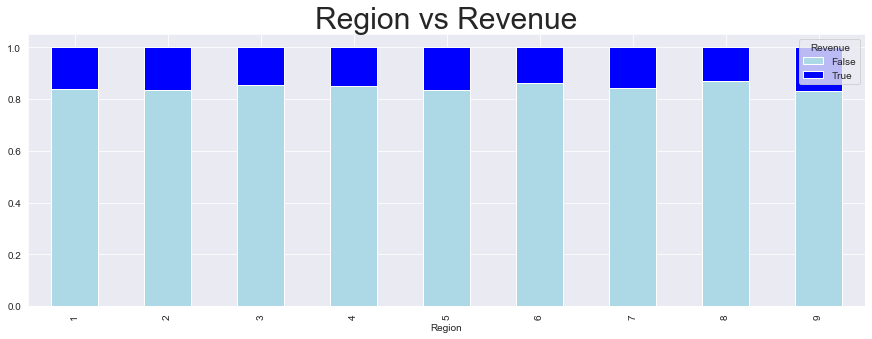

In [22]:
# region vs Revenue
df = pd.crosstab(data.Region, data.Revenue)
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

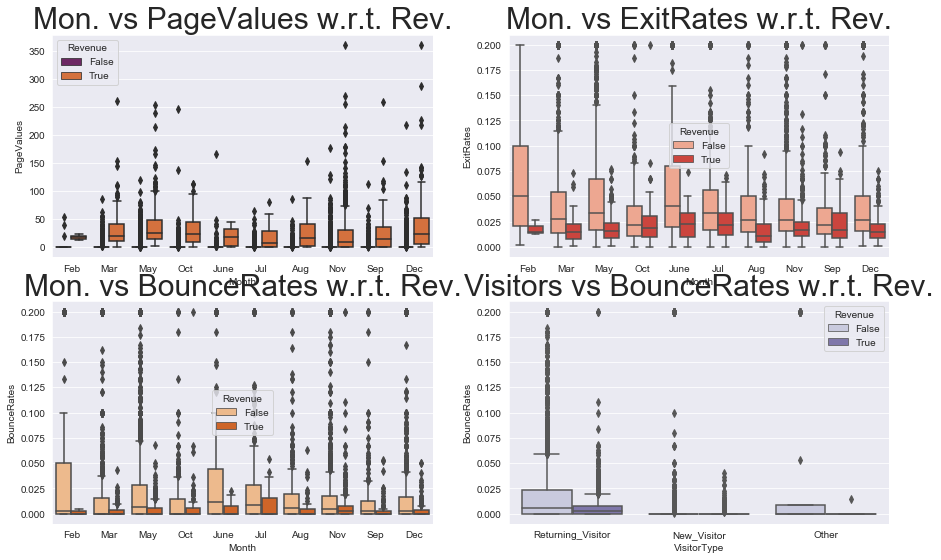

In [23]:
# month vs pagevalues wrt revenue

plt.subplot(2, 2, 1)
sns.boxplot(x = data.Month, y = data.PageValues, hue = data.Revenue, palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.', fontsize = 30)

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data.Month, y = data.ExitRates, hue = data.Revenue, palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.', fontsize = 30)

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data.Month, y = data.BounceRates, hue = data.Revenue, palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data.VisitorType, y = data.BounceRates, hue = data.Revenue, palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.', fontsize = 30)

plt.show()

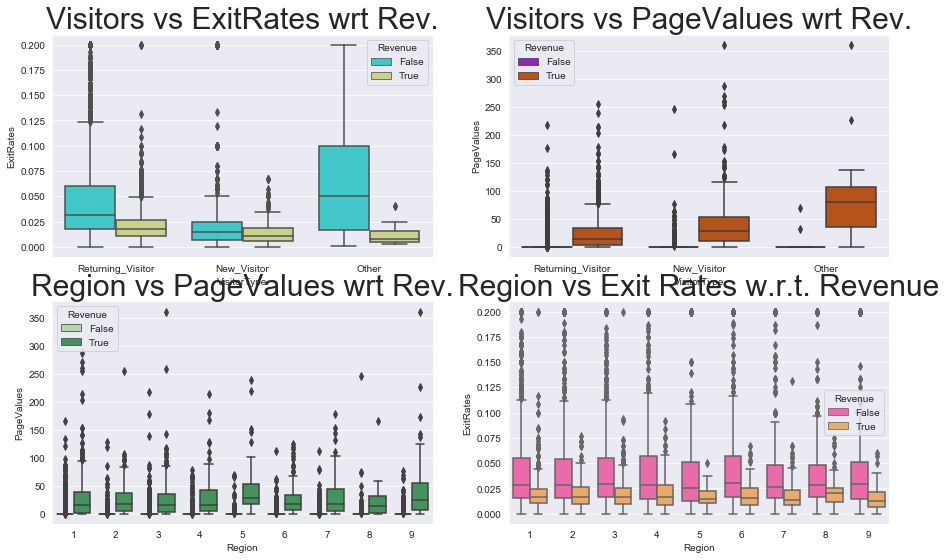

In [24]:

plt.subplot(2, 2, 1)
sns.boxplot(x = data.VisitorType, y = data.ExitRates, hue = data.Revenue, palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.', fontsize = 30)

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data.VisitorType, y = data.PageValues, hue = data.Revenue, palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.', fontsize = 30)
# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data.Region, y = data.PageValues, hue = data.Revenue, palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.', fontsize = 30)

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data.Region, y = data.ExitRates, hue = data.Revenue, palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue', fontsize = 30)

plt.show()

## Clustering Analysis

### Trying to learn the user characteristics of in terms of time spent on the Website

let's cluster Administrative duration and Bounce Rate to different types of clusters in the dataset.

In [33]:
x = data.iloc[:, [2, 7]]
x.shape

(12330, 2)

In [34]:
x.head()

,Administrative_Duration,BounceRates
0,0.0,0.20
1,0.0,0.00
2,0.0,0.20
3,0.0,0.05
4,0.0,0.02


In [35]:
from sklearn.cluster import KMeans

In [36]:
clr_rng=range(1,15)
clr_err=[]
for i in clr_rng:
    model=KMeans(i)
    model.fit(x)
    clr_err.append(model.inertia_)

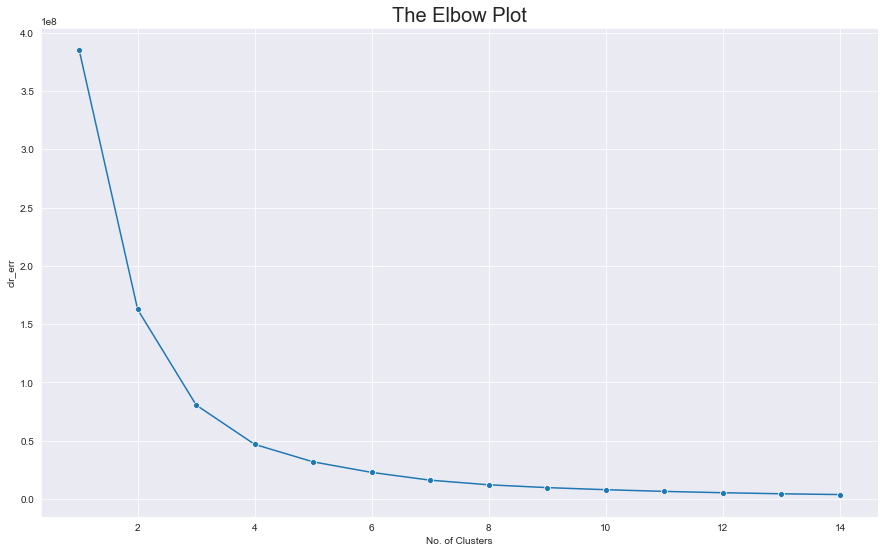

In [37]:
sns.lineplot(range(1,15),clr_err,marker="o")
plt.title('The Elbow Plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('clr_err')
plt.show()

According to this plot, the maximum bend is at fourth index, that is the number of Optimal no. of Clusters for Adminstrative Duration and BounceRates is four. Let's go to the next step, i.e., Plotting the Clusters.

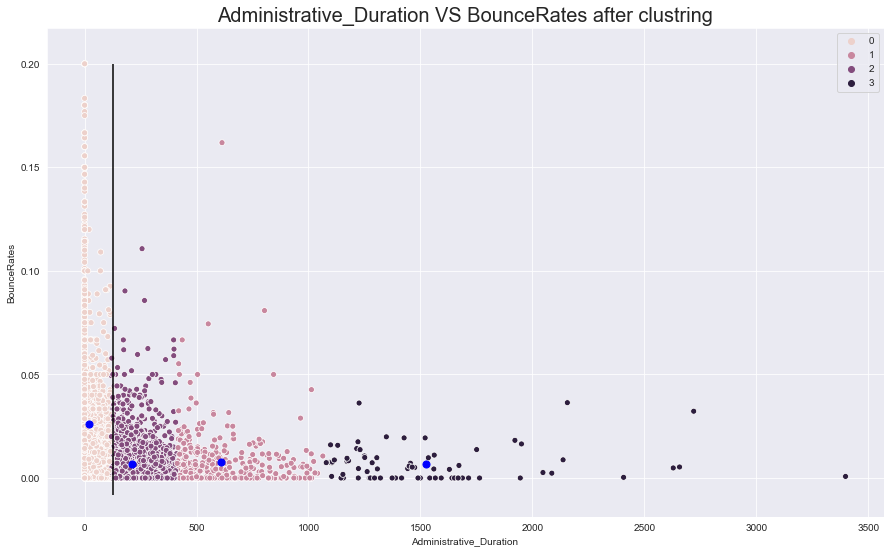

In [38]:
km = KMeans(n_clusters = 4,random_state = 0)
y_means1 = km.fit_predict(x)
sns.scatterplot(x.Administrative_Duration,x.BounceRates,hue=y_means1)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.title('Administrative_Duration VS BounceRates after clustring', fontsize = 20)
plt.xlabel('Administrative_Duration')
plt.ylabel('BounceRates')
plt.vlines(x=125,ymin=-0.008,ymax=0.20)
plt.show()

In [39]:
o0=y_means1[y_means1==0]# Revenue which are Flase, Denoted by Vline

In [40]:
len(o0)

9774

let's cluster Page Values and Exit Rate to different types of clusters in the dataset

In [70]:
x = data.iloc[:, [0,1,2,3,4,5,6,8,7,9]]

In [71]:
x.columns

Index(['Row_ID', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'ExitRates', 'BounceRates', 'PageValues'], dtype='object')

In [72]:
clr_rng=range(1,15)
clr_err=[]
for i in clr_rng:
    model=KMeans(i)
    model.fit(x)
    clr_err.append(model.inertia_)

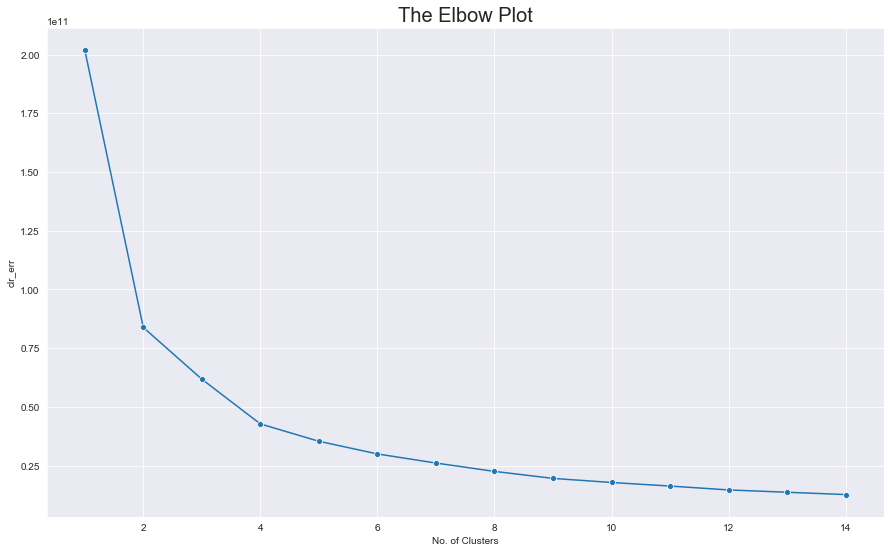

In [73]:
sns.lineplot(range(1,15),clr_err,marker="o")
plt.title('The Elbow Plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('clr_err')
plt.show()

According to this plot, the maximum bend is at fifth index, that is the number of Optimal no. of Clusters for ExitRates and PageValues is five. Let's go to the next step, i.e., Plotting the Clusters.

In [85]:
km.cluster_centers_

array([[9.24239831e+03, 2.65678172e+00, 9.14542351e+01, 6.01685302e-01,
        4.14493113e+01, 3.96582402e+01, 1.49853237e+03, 3.90535246e-02,
        1.94623413e-02, 6.84916876e+00],
       [3.08060481e+03, 1.97288521e+00, 7.01622639e+01, 4.05260594e-01,
        2.74818909e+01, 2.37892515e+01, 8.90368183e+02, 4.70999020e-02,
        2.49257368e-02, 4.92747670e+00]])

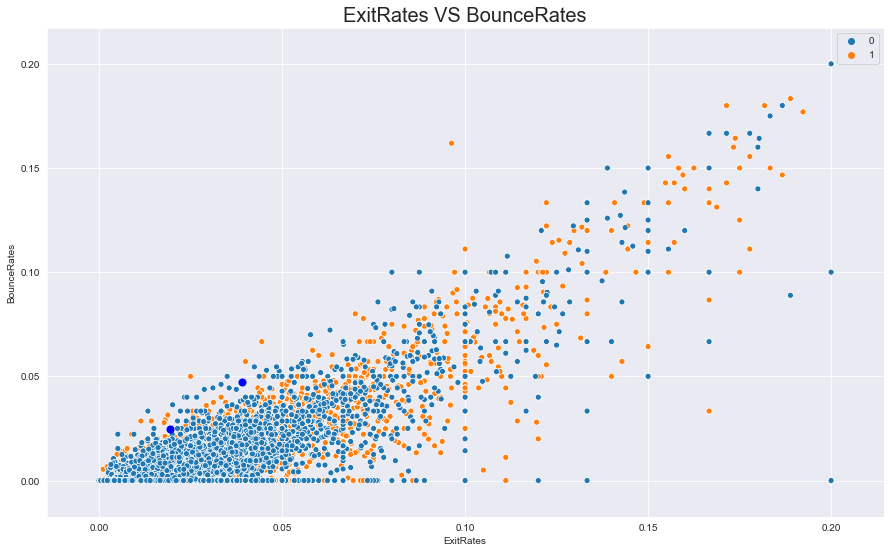

In [84]:
km = KMeans(n_clusters = 2,random_state = 0)
y_means2 = km.fit_predict(x)
sns.scatterplot(x.ExitRates,x.BounceRates,hue=y_means2)
plt.scatter(km.cluster_centers_[0][[7,8]], km.cluster_centers_[1][[7,8]], s = 50, c = 'blue' , label = 'centeroid')
plt.title('ExitRates VS BounceRates', fontsize = 20)
plt.xlabel('ExitRates')
plt.ylabel('BounceRates')
#plt.hlines(y=10,xmin=-0.001,xmax=0.10)
plt.show()

In [ ]:
o0=y_means2[y_means2==0]# Revenue which are Flase, Denoted by Vline

In [ ]:
len(o0)# better clustring

In [ ]:
data.info()

In [ ]:
objectdata=["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]

In [ ]:
for i in data.columns:
    if i in objectdata:
        data[i]=data[i].astype(object)

Changing all features to correct data type

In [ ]:
data.info()

#### Checking all features and there distributions

Text(0.5, 1.0, 'Informational_Duration')

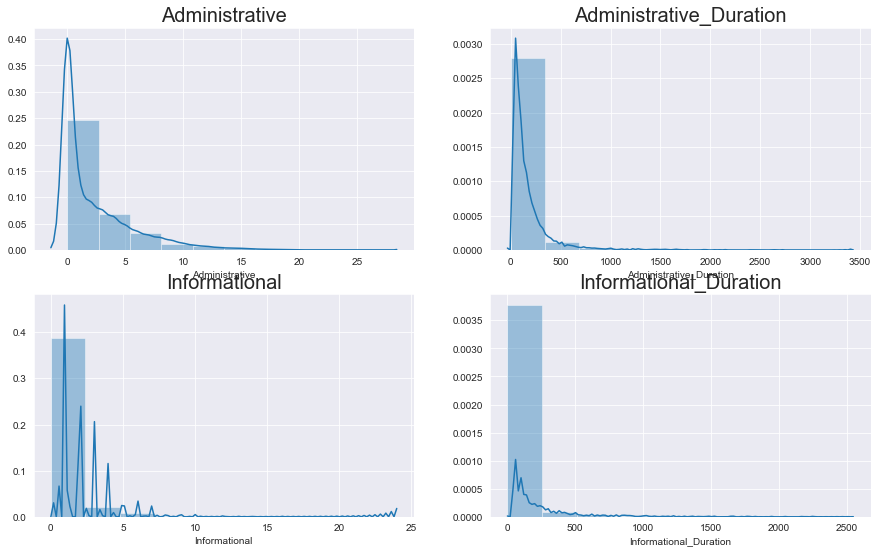

In [86]:
plt.subplot(2,2,1)
sns.distplot(data.Administrative,bins=10)
plt.title('Administrative', fontsize = 20)
plt.subplot(2,2,2)
sns.distplot(data.Administrative_Duration,bins=10)
plt.title('Administrative_Duration', fontsize = 20)
plt.subplot(2,2,3)
sns.distplot(data.Informational,bins=10)
plt.title('Informational', fontsize = 20)
plt.subplot(2,2,4)
sns.distplot(data.Informational_Duration,bins=10)
plt.title('Informational_Duration', fontsize = 20)

In [ ]:
shapiro(data.Administrative),shapiro(data.Administrative_Duration),shapiro(data.Informational),shapiro(data.Informational_Duration)

feature is not normal and as it contains lot of zero taking log will not help, Hence we are forced to leave them as they are

Text(0.5, 1.0, 'ExitRates')

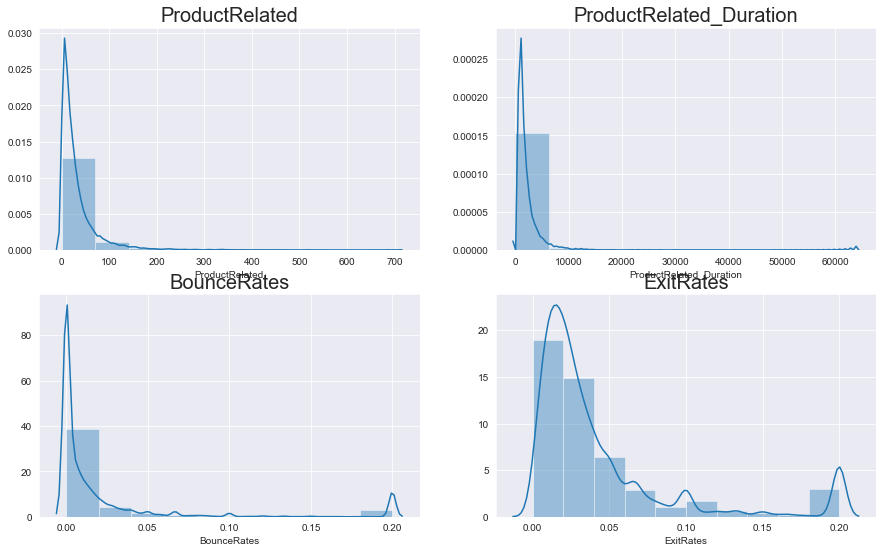

In [87]:
plt.subplot(2,2,1)
sns.distplot(data.ProductRelated,bins=10)
plt.title('ProductRelated', fontsize = 20)
plt.subplot(2,2,2)
sns.distplot(data.ProductRelated_Duration,bins=10)
plt.title('ProductRelated_Duration', fontsize = 20)
plt.subplot(2,2,3)
sns.distplot(data.BounceRates,bins=10)
plt.title('BounceRates', fontsize = 20)
plt.subplot(2,2,4)
sns.distplot(data.ExitRates,bins=10)
plt.title('ExitRates', fontsize = 20)

In [90]:
shapiro(data.ProductRelated),shapiro(data.ProductRelated_Duration),shapiro(data.BounceRates),shapiro(data.ExitRates)

C:\Users\Wolborg\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.



((0.6104096174240112, 0.0),
 (0.5550280809402466, 0.0),
 (0.4922066330909729, 0.0),
 (0.6992335319519043, 0.0))

Similar Poor Distribution of data

### Feature Selection using Statistical methods

In [89]:
from scipy.stats import chi2_contingency,f_oneway,shapiro,kruskal

In [91]:
features=[]
for i in data.columns:
    pvalue=0
    if (data[i].dtypes==object)|(data[i].dtypes==bool):
        cross=pd.crosstab(data["Revenue"],data[i])
        pvalue=chi2_contingency(cross)[1]
        print("CHI",i,pvalue)
        if pvalue<0.05:
            features.append(i)
    else:
        T=data[i][data["Revenue"]==True]
        F=data[i][data["Revenue"]==False]
        shT=shapiro(T)[1]
        shF=shapiro(F)[1]
        if shT<0.05 or shF<0.05:
            pvalue=kruskal(T,F).pvalue
            print("KRU",i,pvalue)
            if pvalue<0.05:
                features.append(i)
        else:
            pvalue=f_oneway(T,F).pvalue
            print("ANOVA",i,pvalue)
            if pvalue<0.05:
                features.append(i)
print(features)

KRU Row_ID 2.2906624635505069e-41
KRU Administrative 1.3118409860995926e-77
KRU Administrative_Duration 4.671944640125305e-74
KRU Informational 1.202706626266764e-36
KRU Informational_Duration 1.4089492366808854e-35
KRU ProductRelated 1.0523572362880605e-107
KRU ProductRelated_Duration 5.331818648910668e-128
KRU BounceRates 1.8326585049883445e-61
KRU ExitRates 1.1567097047584001e-175
KRU PageValues 0.0
KRU SpecialDay 5.079229060937998e-22
CHI Month 2.2387855164805443e-77
KRU OperatingSystems 0.002408438200946139
KRU Browser 0.07146137633249551
KRU Region 0.10049132781251131
KRU TrafficType 0.8949521418678734
CHI VisitorType 4.269904152293867e-30
CHI Weekend 0.0012663251061221968
CHI Revenue 0.0
['Row_ID', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'VisitorType', 'Weekend', 'Revenue']


We can see here that as per our Statistical Tests all our Variables have significant impact on out target variable, Hence inorder to reduce dimentions for our linear model we will do one hot encoding and carry out RFE 

In [92]:
objectdata=data[["Month","OperatingSystems","Browser","Region","TrafficType","VisitorType","Weekend"]]

In [96]:
for i in objectdata.columns:
    objectdata[i]=objectdata[i].astype(object)

C:\Users\Wolborg\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [102]:
objectdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
Month               12330 non-null object
OperatingSystems    12330 non-null object
Browser             12330 non-null object
Region              12330 non-null object
TrafficType         12330 non-null object
VisitorType         12330 non-null object
Weekend             12330 non-null object
dtypes: object(7)
memory usage: 674.4+ KB


In [98]:
objdummies=pd.get_dummies(objectdata,drop_first=True)

In [99]:
objdummies.head()

,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [100]:
objdummies.shape

(12330, 58)

In [103]:
from sklearn.feature_selection import RFECV,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

#### Using RFE to select 20 Best Features for our Logestic Model

In [104]:
data_DUM=pd.concat([data,objdummies],axis=1)
data_DUM=data_DUM.drop(columns=objectdata.columns)
data_DUM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 70 columns):
Row_ID                           12330 non-null int64
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
Revenue                          12330 non-null bool
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar     

In [108]:
xdum=data_DUM.drop(columns="Revenue")
y=data.Revenue
modelLR=LogisticRegression()
rfecv = RFECV(estimator=modelLR, step=1, cv=StratifiedKFold(5),scoring='roc_auc')
rfecv.fit(xdum,y)# Doing RFECV to get best number of Features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 68


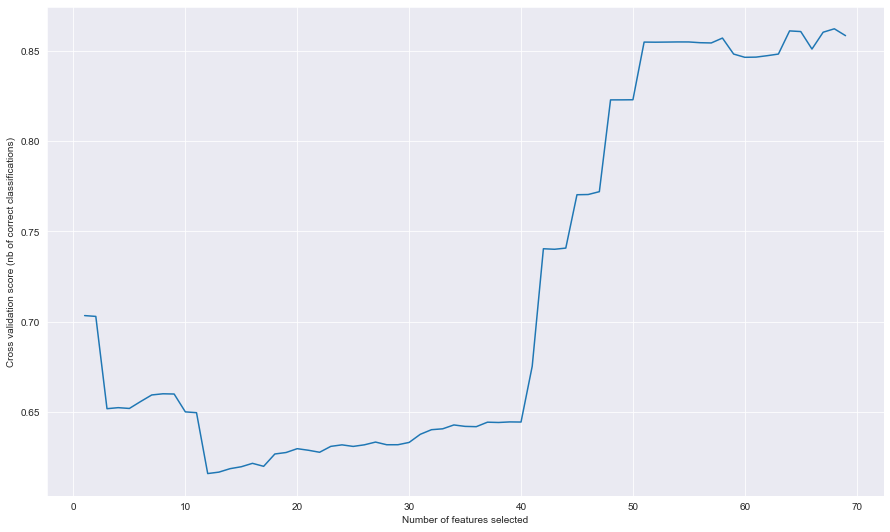

In [109]:
# Plot number of features VS.cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

From the above plot we can make out that at around 52 Features the accuracy is more or less maxed out hence we will now use RFE to select the best 52 Features

In [110]:
rfe=RFE(estimator=modelLR,n_features_to_select=52)
rfe.fit(xdum,y)
rfe.ranking_

array([17,  3, 15,  1, 18, 12, 16,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  8,  1,  1,  1, 10,  1,  1,  1,  1,  1,  4,  1,  1,  1,  1,
        2,  1,  9,  1, 13,  1,  1,  1,  1,  6, 14,  7,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  5,  1,  1,  1,  1,  1,
        1])

In [111]:
selected_features=[]
for i,j in zip(xdum.columns,rfe.ranking_):
    if j==1:
        selected_features.append(i)
print(selected_features)
print(len(selected_features))

['Informational', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_12', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_15', 'TrafficType_16', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Weekend_True']
52


##### As out data is little unbalanced we will apply SMOTE and carry out RFECV again to observe changes

In [112]:
from imblearn.over_sampling import SMOTE

In [114]:
smt=SMOTE()

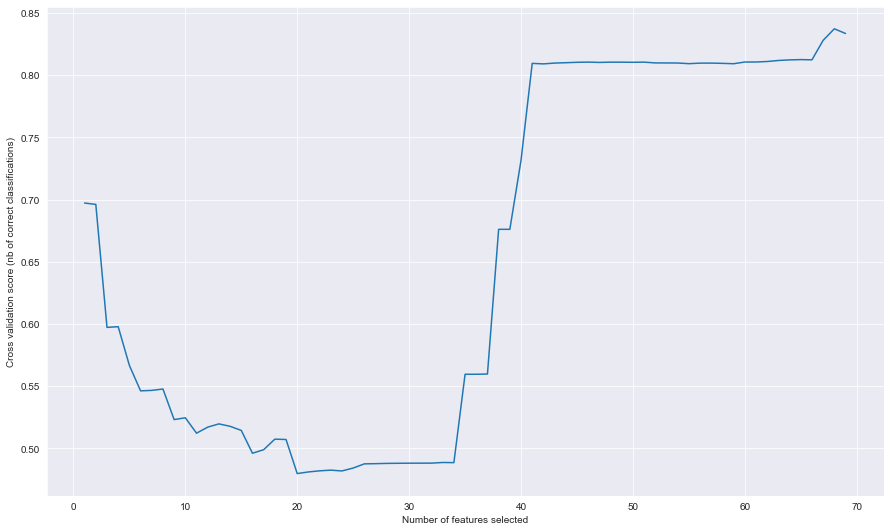

In [115]:
XDUM,Y=smt.fit_sample(xdum,y)
rfecv = RFECV(estimator=modelLR, step=1, cv=StratifiedKFold(5),scoring='roc_auc')
rfecv.fit(XDUM,Y)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

As we can see above that our Linear Model is not Benefitting from Oversampling

## Mean Encoding

In [130]:
data.drop(columns="Row_ID",inplace=True)

In [131]:
data.Revenue[data.Revenue=="True"]=1
data.Revenue[data.Revenue=="False"]=0
data['Revenue']=pd.to_numeric(data['Revenue'])

In [132]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'], dtype='object')

In [133]:
mean_encoding=data.groupby(by="Month").agg({'Revenue':['mean']}).reset_index()
data = data.merge(mean_encoding,on='Month',how='left')
data.columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
              'Month', 'OperatingSystems', 'Browser', 
              'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue','mean_month']

In [134]:
mean_encoding=data.groupby(by="OperatingSystems").agg({'Revenue':['mean']}).reset_index()
data = data.merge(mean_encoding,on='OperatingSystems',how='left')
data.columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
              'Month', 'OperatingSystems', 'Browser', 
              'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue','mean_month','mean_OperatingSystems']

In [135]:
mean_encoding=data.groupby(by="Browser").agg({'Revenue':['mean']}).reset_index()
data = data.merge(mean_encoding,on='Browser',how='left')
data.columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
              'Month', 'OperatingSystems', 'Browser', 
              'Region', 
              'TrafficType', 'VisitorType', 'Weekend', 'Revenue','mean_month','mean_OperatingSystems','mean_Browser'
             ]

In [136]:
mean_encoding=data.groupby(by='Region').agg({'Revenue':['mean']}).reset_index()
data = data.merge(mean_encoding,on='Region',how='left')
data.columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
              'Month', 'OperatingSystems', 'Browser', 
              'Region', 
              'TrafficType', 'VisitorType', 'Weekend', 'Revenue','mean_month','mean_OperatingSystems','mean_Browser'
             ,'mean_Region']

In [137]:
mean_encoding=data.groupby(by='TrafficType').agg({'Revenue':['mean']}).reset_index()
data = data.merge(mean_encoding,on='TrafficType',how='left')
data.columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
              'Month', 'OperatingSystems', 'Browser', 
              'Region', 
              'TrafficType', 'VisitorType', 'Weekend', 'Revenue','mean_month','mean_OperatingSystems','mean_Browser'
             ,'mean_Region','mean_TrafficType']

In [138]:
mean_encoding=data.groupby(by='VisitorType').agg({'Revenue':['mean']}).reset_index()
data = data.merge(mean_encoding,on='VisitorType',how='left')
data.columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
              'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
              'Month', 'OperatingSystems', 'Browser', 
              'Region', 
              'TrafficType', 'VisitorType', 'Weekend', 'Revenue','mean_month','mean_OperatingSystems','mean_Browser'
             ,'mean_Region','mean_TrafficType','mean_VisitorType']

In [140]:
data.drop(columns=[ 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'],inplace=True)

## Splitting Data Into training and testing

In [144]:
x=data.drop(columns="Revenue")
y=data.Revenue

In [145]:
from sklearn.model_selection import KFold,cross_val_score,train_test_split

In [151]:
X,Y=smt.fit_sample(x,y)#Oversampling

In [152]:
X=pd.DataFrame(X)
X.columns=x.columns

In [153]:
Y=pd.Series(Y)

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)#keeping some data as unseen for testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

## Model Building and Comparisen

### Linear Models(LR,NB)

#### LR

In [156]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [176]:
modelLR=LogisticRegression(C=2)

In [177]:
for model,name in zip([modelLR],["LR"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9237632128899145 VAR: 0.0035033076592893967 LR


ROC_AUC: 0.9067694811708915 VAR: 0.011455904533487753 LR Without SMOTE

ROC_AUC: 0.9237632128899145 VAR: 0.0035033076592893967 LR With SMOTE

#### LR Model Evaluation

In [179]:
modelLR.fit(X_train,Y_train)
y_probaLR=modelLR.predict_proba(x_test)[:,1]
y_predLR=modelLR.predict(x_test)
roc_auc_score(y_test,y_probaLR)

0.9065076896298084

Testing Score LR: 0.899055009348838 Without SMOTE

Testing Score LR: 0.9065076896298084 With SMOTE

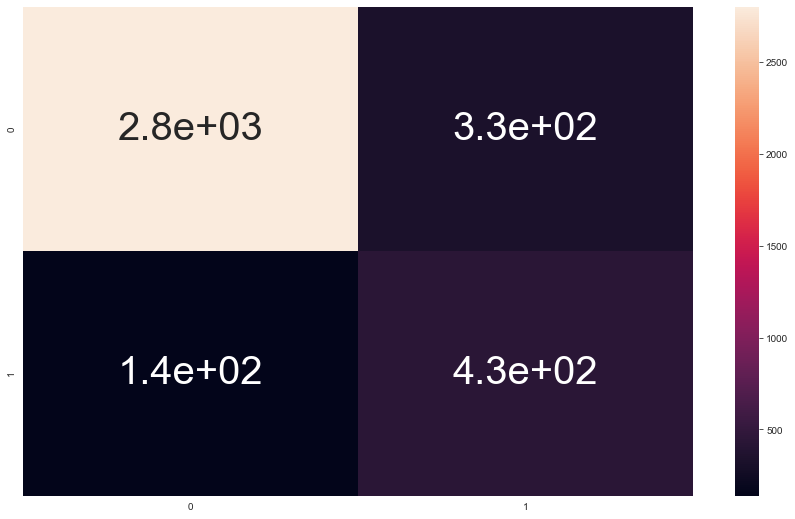

In [180]:
cm=confusion_matrix(y_test,y_predLR)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [181]:
cr=classification_report(y_test,y_predLR,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.95      0.90      0.92      3130
        True       0.57      0.76      0.65       569

    accuracy                           0.87      3699
   macro avg       0.76      0.83      0.79      3699
weighted avg       0.89      0.87      0.88      3699



### Navies_baised

In [182]:
from sklearn.naive_bayes import GaussianNB

In [183]:
modelNB=GaussianNB()

In [185]:
for model,name in zip([modelNB],["NB"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.8551688761461673 VAR: 0.002620018548176811 NB


ROC_AUC: 0.8551688761461673 VAR: 0.002620018548176811 NB With ME and With SMOTE

ROC_AUC: 0.8508415891394204 VAR: 0.01374487304292901 NB With ME and Without SMOTE

ROC_AUC: 0.7931795067463161 VAR: 0.010375160604577504 NB Without ME


#### NB Model Evaluation

In [187]:
modelNB.fit(X_train,Y_train)
y_probaLR=modelNB.predict_proba(x_test)[:,1]
y_predLR=modelNB.predict(x_test)
roc_auc_score(y_test,y_probaLR)

0.8495044835117942

Testing Score NB: 0.7947563585935223 Without SMOTE and ME

Testing Score NB: 0.8486774061326131 Without SMOTE and with ME

Testing Score NB: 0.8495044835117942 With SMOTE

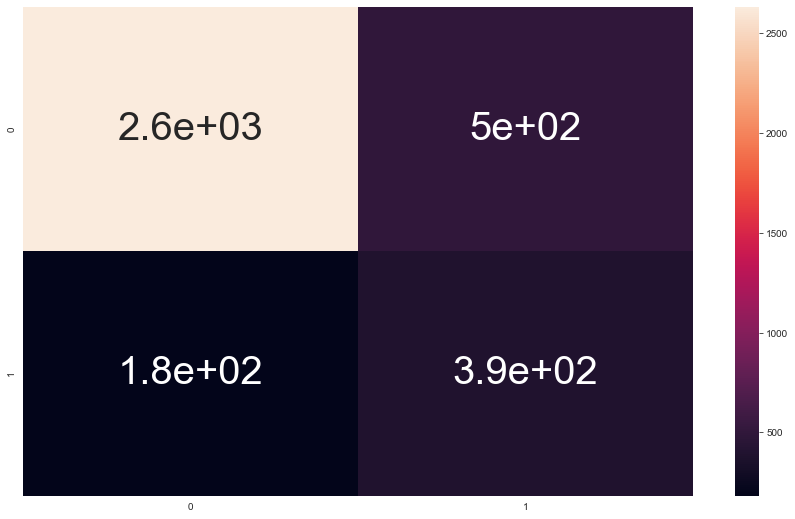

In [188]:
cm=confusion_matrix(y_test,y_predLR)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [189]:
cr=classification_report(y_test,y_predLR,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.94      0.84      0.89      3130
        True       0.44      0.68      0.53       569

    accuracy                           0.82      3699
   macro avg       0.69      0.76      0.71      3699
weighted avg       0.86      0.82      0.83      3699



### Distance Based Models (KNN)

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [206]:
modelKNN=KNeighborsClassifier(n_neighbors=10,weights='distance')

In [194]:
sc=StandardScaler()

In [196]:
xsc=sc.fit_transform(x_train)
xsc_test=sc.fit_transform(x_test)
XSC=sc.fit_transform(X_train)
XSC_test=sc.fit_transform(X_test)

In [209]:
for model,name in zip([modelKNN],["KNN"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,XSC,Y_train,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9481394309209176 VAR: 0.0038049263883904046 KNN


ROC_AUC: 0.9481394309209176 VAR: 0.0038049263883904046 KNN With SMOTE

ROC_AUC: 0.8361219302658747 VAR: 0.012242995155385837 KNN without SMOTE

#### KNN Evaluation

In [215]:
modelKNN.fit(xsc,y_train)
y_probaLR=modelKNN.predict_proba(x_test)[:,1]
y_predLR=modelKNN.predict(x_test)
roc_auc_score(y_test,y_probaLR)

0.6123404661504686

Testing Score KNN: 0.6123404661504686 Without SMOTE and with ME

Testing Score KNN: 0.5204194905023667 With SMOTE

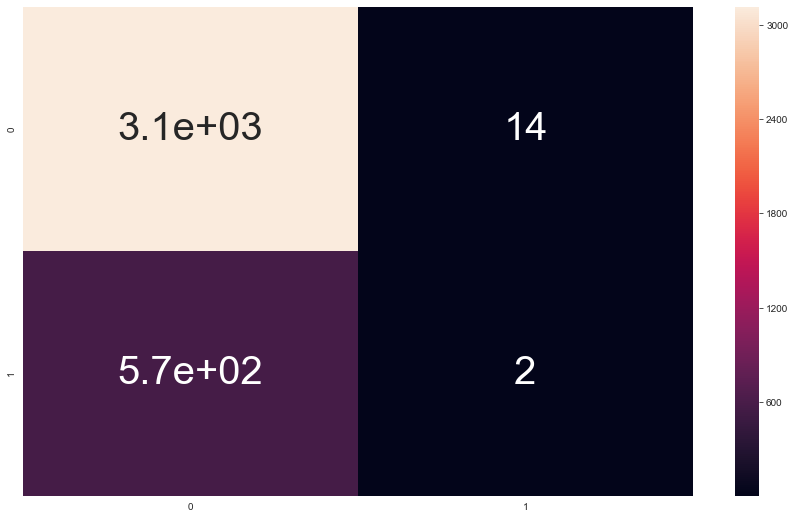

In [216]:
cm=confusion_matrix(y_test,y_predLR)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [217]:
cr=classification_report(y_test,y_predLR,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.85      1.00      0.91      3130
        True       0.12      0.00      0.01       569

    accuracy                           0.84      3699
   macro avg       0.49      0.50      0.46      3699
weighted avg       0.74      0.84      0.78      3699



## Tree Based Model (DT) 

In [218]:
from sklearn.tree import DecisionTreeClassifier

In [259]:
modelDT=DecisionTreeClassifier(criterion='gini',max_depth=7)

In [220]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [260]:
for model,name in zip([modelDT],["DT"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9622339149649569 VAR: 0.0022484035399382117 DT


ROC_AUC: 0.920528533715818 VAR: 0.014487714822893521 DT Without SMOTE

ROC_AUC: 0.9622339149649569 VAR: 0.0022484035399382117 DT With SMOTE

### DT Evaluation

In [263]:
modelDT.fit(X_train,Y_train)
y_probaDT=modelDT.predict_proba(x_test)[:,1]
y_predDT=modelDT.predict(x_test)
roc_auc_score(y_test,y_probaDT)

0.9235492456358053

Testing Score DT: 0.9107065250958748 Without SMOTE and with ME

Testing Score DT: 0.9234476156251932 With SMOTE

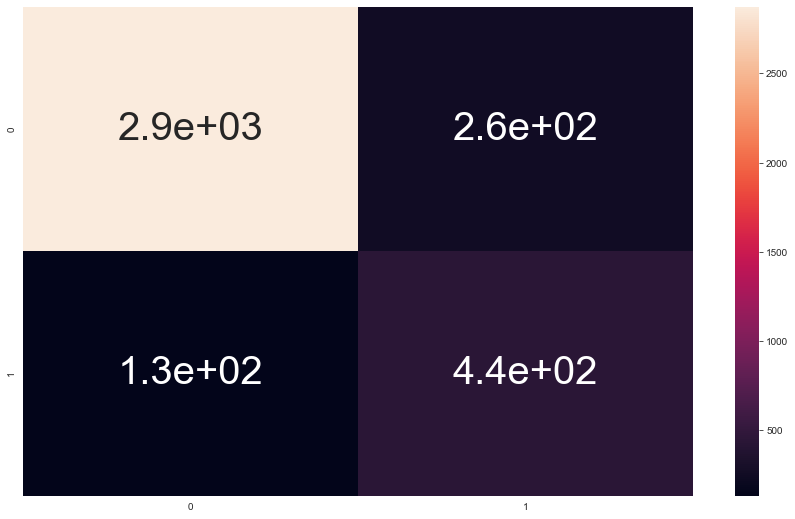

In [264]:
cm=confusion_matrix(y_test,y_predDT)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [265]:
cr=classification_report(y_test,y_predDT,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.96      0.92      0.94      3130
        True       0.63      0.77      0.69       569

    accuracy                           0.90      3699
   macro avg       0.79      0.84      0.81      3699
weighted avg       0.91      0.90      0.90      3699



## Ensemble Models(RF, GB if required) 

In [268]:
from sklearn.ensemble import RandomForestClassifier

In [283]:
modelRF=RandomForestClassifier(criterion='entropy',n_estimators=1200,n_jobs=-1)

In [285]:
for model,name in zip([modelRF],["RF"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9868781385244809 VAR: 0.0007338283651163636 RF


ROC_AUC: 0.9300644691981527 VAR: 0.008895185486188216 RF Without SMOTE


ROC_AUC: 0.9868781385244809 VAR: 0.0007338283651163636 RF With SMOTE

### RF Evaluation

In [287]:
modelRF.fit(X_train,Y_train)
y_probaRF=modelRF.predict_proba(x_test)[:,1]
y_predRF=modelRF.predict(x_test)
roc_auc_score(y_test,y_probaRF)

0.9909509986131153

Testing Score RF: 0.9293404717653864 Without SMOTE and with ME

Testing Score RF: 0.9909509986131153 With SMOTE

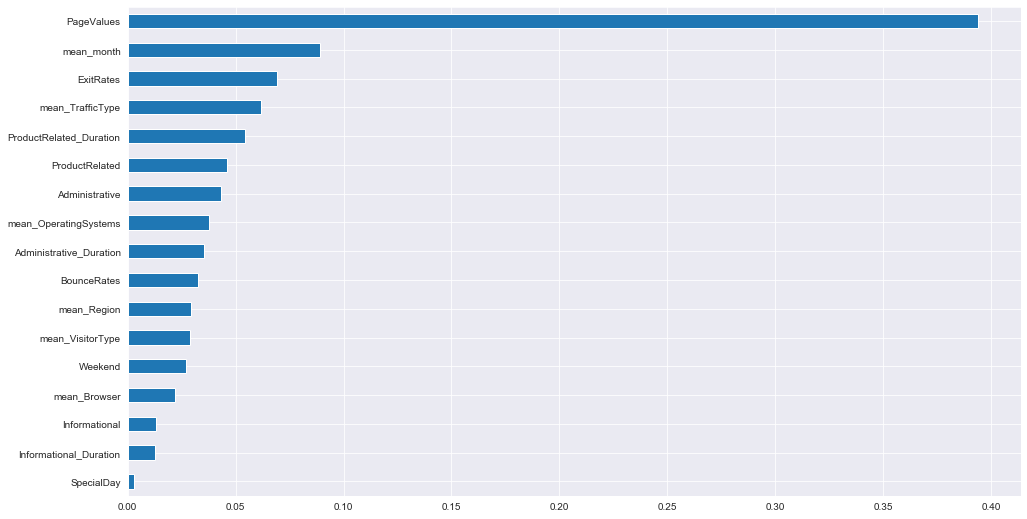

In [288]:
features=modelRF.feature_importances_
feat_importances = pd.Series(features, index=x.columns)
plt.figure(figsize=(16,9))
feat_importances.nsmallest(46).plot(kind='barh')

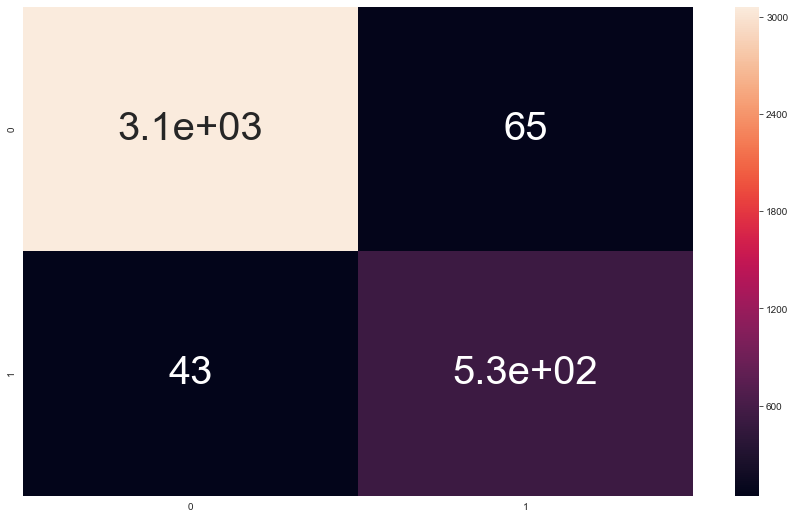

In [289]:
cm=confusion_matrix(y_test,y_predRF)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [290]:
cr=classification_report(y_test,y_predRF,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.99      0.98      0.98      3130
        True       0.89      0.92      0.91       569

    accuracy                           0.97      3699
   macro avg       0.94      0.95      0.94      3699
weighted avg       0.97      0.97      0.97      3699



### LGBM

In [291]:
from lightgbm import LGBMClassifier

In [369]:
modelLGBM=LGBMClassifier(boosting_type='gbdt',colsample_bytree=0.9,learning_rate=0.6, max_depth=2,
               min_child_samples=20, min_child_weight=3.51,n_estimators=200, n_jobs=-1)

In [370]:
for model,name in zip([modelLGBM],["LGBM"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9853304132619171 VAR: 0.001413340628082568 LGBM


ROC_AUC: 0.932182369747227 VAR: 0.008852784158940587 LGBM without SMOTE

ROC_AUC: 0.9853304132619171 VAR: 0.001413340628082568 LGBM with SMOTE

### LGBM Evaluation

In [373]:
modelLGBM.fit(X_train,Y_train)
y_probaLGBM=modelLGBM.predict_proba(x_test)[:,1]
y_predLGBM=modelLGBM.predict(x_test)
roc_auc_score(y_test,y_probaLGBM)

0.9559908364542917

Testing Score LGBM: 0.9220379905332486 Without SMOTE and with ME

Testing Score LGBM: 0.9559908364542917 With SMOTE

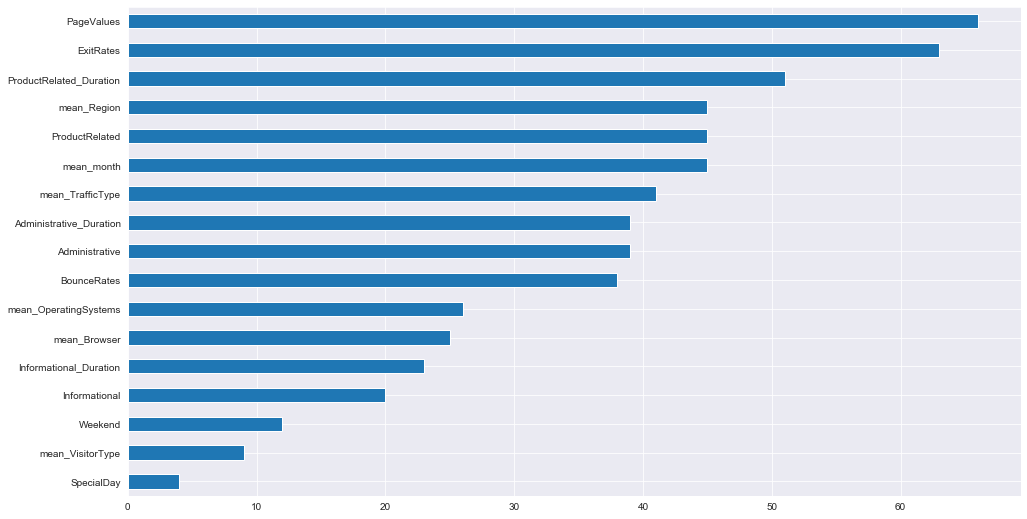

In [374]:
features=modelLGBM.feature_importances_
feat_importances = pd.Series(features, index=x.columns)
plt.figure(figsize=(16,9))
feat_importances.nsmallest(46).plot(kind='barh')

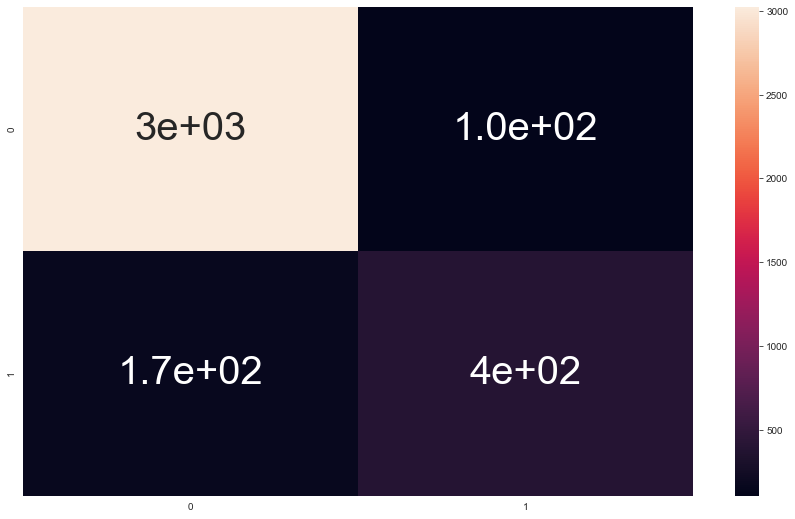

In [375]:
cm=confusion_matrix(y_test,y_predLGBM)
sns.heatmap(cm,annot=True,annot_kws={"size": 40})

In [376]:
cr=classification_report(y_test,y_predLGBM,target_names=["False","True"])
print(cr)

              precision    recall  f1-score   support

       False       0.95      0.97      0.96      3130
        True       0.79      0.70      0.74       569

    accuracy                           0.93      3699
   macro avg       0.87      0.83      0.85      3699
weighted avg       0.92      0.93      0.92      3699



### XGBM

In [377]:
from xgboost import XGBRFClassifier

In [391]:
modelXGBRF=XGBRFClassifier(max_depth=10,learning_rate=0.01,n_estimators=300)

In [393]:
for model,name in zip([modelXGBRF],["XGBRF"]):
    error=[]
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    error=cross_val_score(model,X_train,Y_train,scoring='roc_auc',cv=kfold)
    print("ROC_AUC:",np.mean(error),"VAR:",np.std(error,ddof=1),name)

ROC_AUC: 0.9800641809313617 VAR: 0.0011019561094086825 XGBRF


ROC_AUC: 0.9292680869978092 VAR: 0.010925671705247603 XGBRF without SMOTE

ROC_AUC: 0.9800641809313617 VAR: 0.0011019561094086825 XGBRF With SMOTE

In [397]:
modelXGBRF.fit(X_train,Y_train)
y_probaXGBRF=modelXGBRF.predict_proba(x_test)[:,1]
y_predXGBRF=modelXGBRF.predict(x_test)
roc_auc_score(y_test,y_probaXGBRF)

0.9595091438934962

Testing Score LGBM: 0.9283070461602385 Without SMOTE and with ME

Testing Score LGBM: 0.9595091438934962 With SMOTE

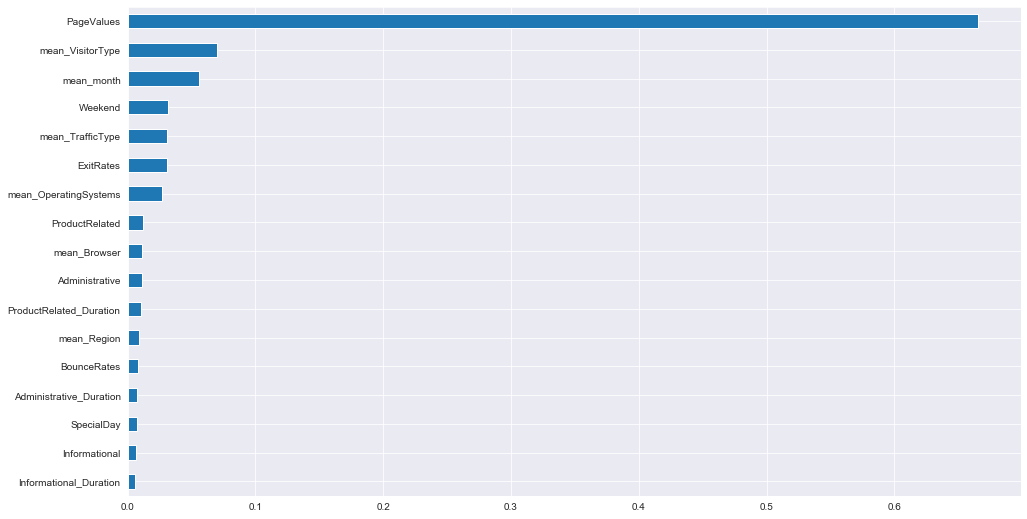

In [398]:
features=modelXGBRF.feature_importances_
feat_importances = pd.Series(features, index=x.columns)
plt.figure(figsize=(16,9))
feat_importances.nsmallest(46).plot(kind='barh')